# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [4]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [5]:
train, test = keras.datasets.cifar10.load_data()

In [6]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

def optimizer_type(x,lr):
    if x == 'SGD':
        return keras.optimizers.SGD(lr = lr,nesterov=True,momentum = MOMENTUM)
    elif x == 'RMSprop':
        return keras.optimizers.RMSprop(lr = lr)
    elif x == 'AdaGrad':
        return keras.optimizers.Adagrad(lr = lr)
    else:
        return keras.optimizers.Adam(lr = lr)    

In [9]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
optim = ['SGD','RMSprop','AdaGrad','Adam']

In [12]:
results = {}

for optimizers in optim:
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = optimizer_type(optimizers,lr)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "{0}-lr-{1}".format(optimizers,lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8233 - acc: 0.3469 - val_loss: 1.6869 - val_acc: 0.4064
Epoch 2/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.6033 - acc: 0.4293 - val_loss: 1.6406 - val_acc: 0.4103
Epoch 3/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5120 - acc: 0.4657 - val_loss: 1.5531 - val_acc: 0.4504
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.4490 - acc: 0.4856 - val_loss: 1.4773 - val_acc: 0.4728
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.3989 - acc: 0.5020 - val_loss: 1.4642 - val_acc: 0.4763
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3627 - acc: 0.5178 - val_loss: 1.5376 - val_acc: 0.4517
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.3223 - acc: 0.5323 - val_loss: 1.4474 - val_acc

50000/50000 [==============================] - 4s 83us/step - loss: 1.8143 - acc: 0.3631 - val_loss: 1.7634 - val_acc: 0.3842
Epoch 3/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7234 - acc: 0.3971 - val_loss: 1.7040 - val_acc: 0.3968
Epoch 4/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6628 - acc: 0.4194 - val_loss: 1.6554 - val_acc: 0.4166
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6157 - acc: 0.4343 - val_loss: 1.6059 - val_acc: 0.4307
Epoch 6/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5761 - acc: 0.4474 - val_loss: 1.5797 - val_acc: 0.4374
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5423 - acc: 0.4621 - val_loss: 1.5447 - val_acc: 0.4580
Epoch 8/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5115 - acc: 0.4711 - val_loss: 1.5207 - val_acc: 0.4621
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9916 - acc: 0.3010 - val_loss: 1.9696 - val_acc: 0.3052
Epoch 5/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.9521 - acc: 0.3130 - val_loss: 1.9363 - val_acc: 0.3213
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9228 - acc: 0.3256 - val_loss: 1.9111 - val_acc: 0.3259
Epoch 7/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.8998 - acc: 0.3321 - val_loss: 1.8917 - val_acc: 0.3362
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8809 - acc: 0.3390 - val_loss: 1.8739 - val_acc: 0.3408
Epoch 9/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8644 - acc: 0.3468 - val_loss: 1.8596 - val_acc: 0.3470
Epoch 10/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8492 - acc: 0.3506 - val_loss: 1.8455 - val_acc: 0.3569
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 4s 85us/step - loss: 2.2595 - acc: 0.1771 - val_loss: 2.2544 - val_acc: 0.1843
Epoch 6/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.2483 - acc: 0.1873 - val_loss: 2.2435 - val_acc: 0.1958
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.2377 - acc: 0.1963 - val_loss: 2.2330 - val_acc: 0.2026
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.2273 - acc: 0.2054 - val_loss: 2.2226 - val_acc: 0.2115
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 2.2173 - acc: 0.2127 - val_loss: 2.2126 - val_acc: 0.2184
Epoch 10/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.2074 - acc: 0.2183 - val_loss: 2.2026 - val_acc: 0.2257
Epoch 11/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.1977 - acc: 0.2250 - val_loss: 2.1929 - val_acc: 0.2324
Epoch 12/50
50000/50000 [=========================

50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==========

Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 5s 101us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000

Epoch 8/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5408 - acc: 0.4493 - val_loss: 1.5770 - val_acc: 0.4486
Epoch 9/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.5117 - acc: 0.4637 - val_loss: 1.5205 - val_acc: 0.4529
Epoch 10/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4748 - acc: 0.4723 - val_loss: 1.5932 - val_acc: 0.4358
Epoch 11/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4524 - acc: 0.4808 - val_loss: 1.5122 - val_acc: 0.4596
Epoch 12/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4272 - acc: 0.4891 - val_loss: 1.5039 - val_acc: 0.4675
Epoch 13/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4003 - acc: 0.4998 - val_loss: 1.5781 - val_acc: 0.4483
Epoch 14/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3764 - acc: 0.5097 - val_loss: 1.4768 - val_acc: 0.4814
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 5s 99us/step - loss: 1.4921 - acc: 0.4711 - val_loss: 1.5136 - val_acc: 0.4673
Epoch 10/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4668 - acc: 0.4830 - val_loss: 1.5265 - val_acc: 0.4561
Epoch 11/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4465 - acc: 0.4906 - val_loss: 1.4899 - val_acc: 0.4675
Epoch 12/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.4192 - acc: 0.4984 - val_loss: 1.4929 - val_acc: 0.4604
Epoch 13/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4021 - acc: 0.5066 - val_loss: 1.5002 - val_acc: 0.4674
Epoch 14/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3865 - acc: 0.5114 - val_loss: 1.4194 - val_acc: 0.4958
Epoch 15/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.3669 - acc: 0.5204 - val_loss: 1.4552 - val_acc: 0.4794
Epoch 16/50
50000/50000 [===================

50000/50000 [==============================] - 5s 103us/step - loss: 1.6968 - acc: 0.4108 - val_loss: 1.6940 - val_acc: 0.4135
Epoch 11/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.6812 - acc: 0.4191 - val_loss: 1.6945 - val_acc: 0.4112
Epoch 12/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.6663 - acc: 0.4227 - val_loss: 1.6734 - val_acc: 0.4131
Epoch 13/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6537 - acc: 0.4269 - val_loss: 1.6678 - val_acc: 0.4220
Epoch 14/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6409 - acc: 0.4336 - val_loss: 1.6656 - val_acc: 0.4226
Epoch 15/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.6295 - acc: 0.4357 - val_loss: 1.6424 - val_acc: 0.4258
Epoch 16/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.6186 - acc: 0.4419 - val_loss: 1.6235 - val_acc: 0.4403
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 5s 99us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 5s 103us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 5s 96us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 5s 100us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 5s 95us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [=====

Epoch 12/50
50000/50000 [==============================] - 5s 94us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 5s 92us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 5s 93us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50

50000/50000 [==============================] - 5s 91us/step - loss: 1.5016 - acc: 0.4747 - val_loss: 1.5336 - val_acc: 0.4565
Epoch 14/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4895 - acc: 0.4787 - val_loss: 1.5178 - val_acc: 0.4696
Epoch 15/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4767 - acc: 0.4857 - val_loss: 1.5037 - val_acc: 0.4684
Epoch 16/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4669 - acc: 0.4892 - val_loss: 1.4880 - val_acc: 0.4772
Epoch 17/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4568 - acc: 0.4923 - val_loss: 1.4922 - val_acc: 0.4702
Epoch 18/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4465 - acc: 0.4969 - val_loss: 1.4901 - val_acc: 0.4726
Epoch 19/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.4377 - acc: 0.4991 - val_loss: 1.4861 - val_acc: 0.4691
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 92us/step - loss: 1.7453 - acc: 0.3948 - val_loss: 1.7450 - val_acc: 0.3975
Epoch 15/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7398 - acc: 0.3979 - val_loss: 1.7396 - val_acc: 0.3973
Epoch 16/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7345 - acc: 0.3999 - val_loss: 1.7349 - val_acc: 0.4028
Epoch 17/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7298 - acc: 0.4010 - val_loss: 1.7308 - val_acc: 0.4035
Epoch 18/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7252 - acc: 0.4012 - val_loss: 1.7257 - val_acc: 0.4035
Epoch 19/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7208 - acc: 0.4043 - val_loss: 1.7213 - val_acc: 0.4030
Epoch 20/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.7166 - acc: 0.4047 - val_loss: 1.7171 - val_acc: 0.4067
Epoch 21/50
50000/50000 [=====================

Epoch 16/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0935 - acc: 0.2839 - val_loss: 2.0927 - val_acc: 0.2817
Epoch 17/50
50000/50000 [==============================] - 5s 96us/step - loss: 2.0889 - acc: 0.2853 - val_loss: 2.0883 - val_acc: 0.2829
Epoch 18/50
50000/50000 [==============================] - 5s 94us/step - loss: 2.0845 - acc: 0.2870 - val_loss: 2.0840 - val_acc: 0.2840
Epoch 19/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0803 - acc: 0.2896 - val_loss: 2.0800 - val_acc: 0.2853
Epoch 20/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.0763 - acc: 0.2905 - val_loss: 2.0761 - val_acc: 0.2883
Epoch 21/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0725 - acc: 0.2923 - val_loss: 2.0724 - val_acc: 0.2897
Epoch 22/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.0689 - acc: 0.2931 - val_loss: 2.0688 - val_acc: 0.2903
Epoch 23/50
50000/50000 [=========

50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 6s 114us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 6s 122us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 6s 121us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 6s 115us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [

50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 6s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 6s 112us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [

Epoch 18/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1746 - acc: 0.5832 - val_loss: 1.3813 - val_acc: 0.5146
Epoch 19/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1506 - acc: 0.5890 - val_loss: 1.3922 - val_acc: 0.5094
Epoch 20/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1383 - acc: 0.5909 - val_loss: 1.4334 - val_acc: 0.4967
Epoch 21/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1145 - acc: 0.6008 - val_loss: 1.3572 - val_acc: 0.5266
Epoch 22/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0960 - acc: 0.6086 - val_loss: 1.3836 - val_acc: 0.5219
Epoch 23/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.0800 - acc: 0.6126 - val_loss: 1.3853 - val_acc: 0.5230
Epoch 24/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.0561 - acc: 0.6214 - val_loss: 1.3788 - val_acc: 0.5236
Epoch 25/50
50000/50000 [==

50000/50000 [==============================] - 6s 118us/step - loss: 1.2126 - acc: 0.5762 - val_loss: 1.3571 - val_acc: 0.5204
Epoch 20/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1885 - acc: 0.5841 - val_loss: 1.3427 - val_acc: 0.5231
Epoch 21/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.1734 - acc: 0.5912 - val_loss: 1.3322 - val_acc: 0.5316
Epoch 22/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.1562 - acc: 0.5969 - val_loss: 1.3603 - val_acc: 0.5233
Epoch 23/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1474 - acc: 0.6003 - val_loss: 1.3934 - val_acc: 0.5074
Epoch 24/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.1327 - acc: 0.6050 - val_loss: 1.3247 - val_acc: 0.5327
Epoch 25/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.1165 - acc: 0.6117 - val_loss: 1.3261 - val_acc: 0.5334
Epoch 26/50
50000/50000 [==============

50000/50000 [==============================] - 6s 118us/step - loss: 1.5345 - acc: 0.4630 - val_loss: 1.5519 - val_acc: 0.4540
Epoch 21/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.5265 - acc: 0.4662 - val_loss: 1.5481 - val_acc: 0.4591
Epoch 22/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.5172 - acc: 0.4689 - val_loss: 1.5371 - val_acc: 0.4567
Epoch 23/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.5097 - acc: 0.4716 - val_loss: 1.5306 - val_acc: 0.4632
Epoch 24/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.5021 - acc: 0.4762 - val_loss: 1.5285 - val_acc: 0.4647
Epoch 25/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.4941 - acc: 0.4771 - val_loss: 1.5196 - val_acc: 0.4667
Epoch 26/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4866 - acc: 0.4793 - val_loss: 1.5172 - val_acc: 0.4630
Epoch 27/50
50000/50000 [==============

SyntaxError: invalid syntax (<ipython-input-41-dac7a48f8a84>, line 1)

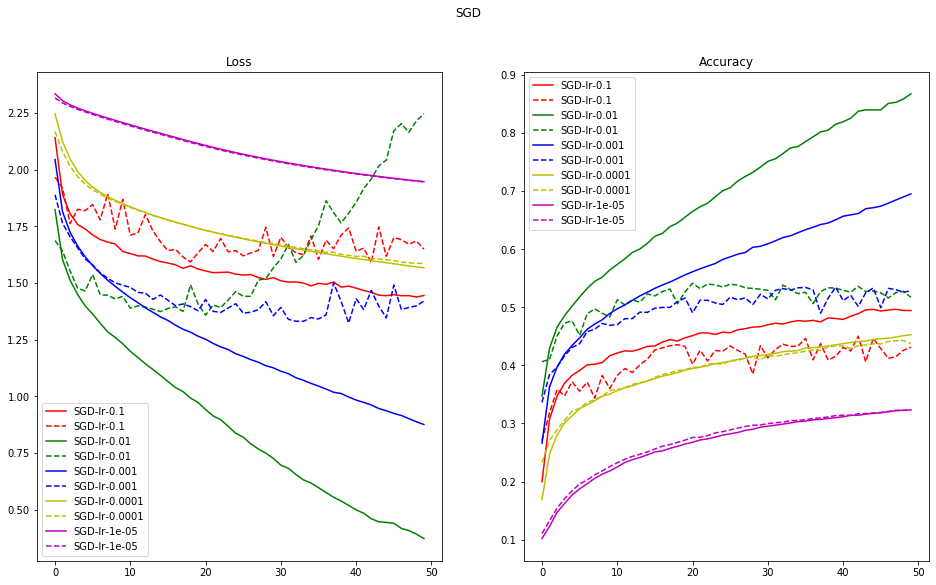

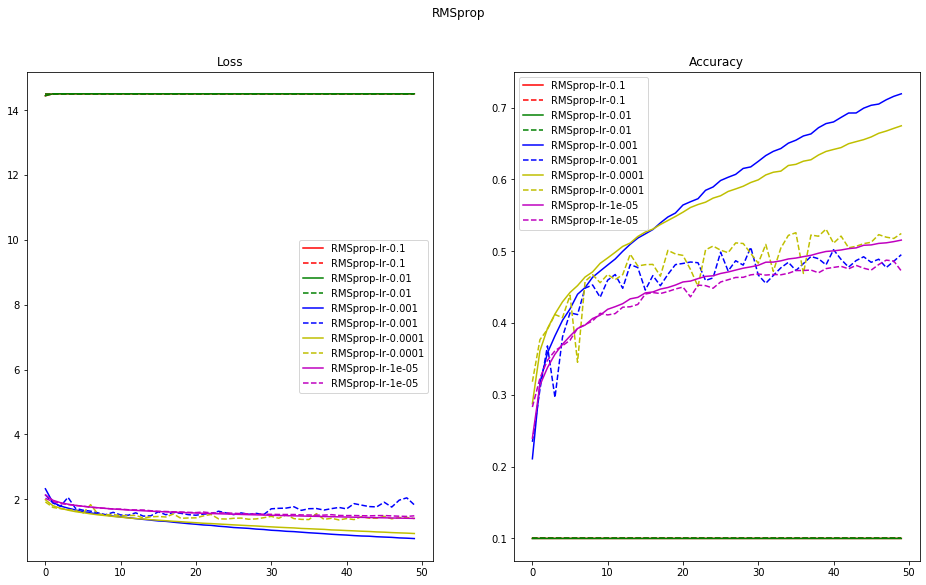

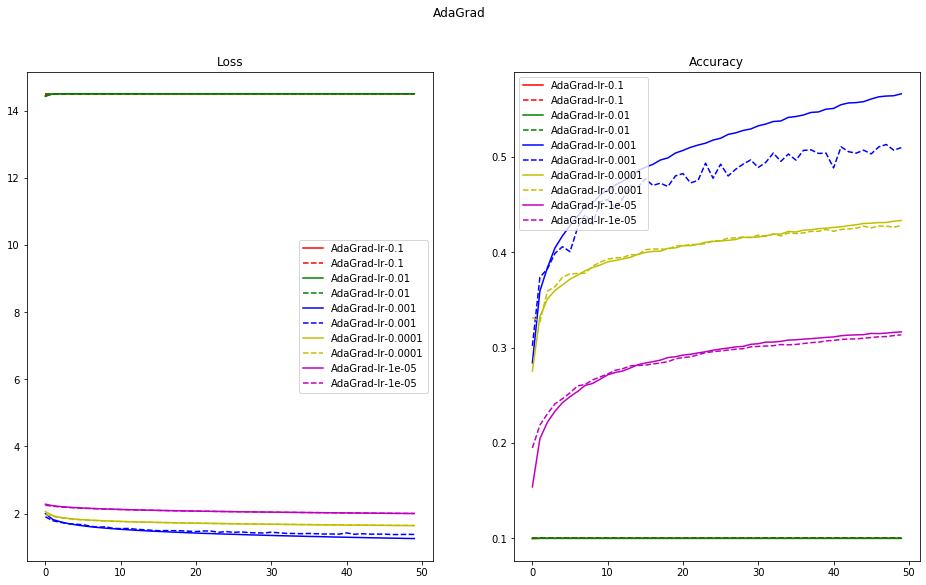

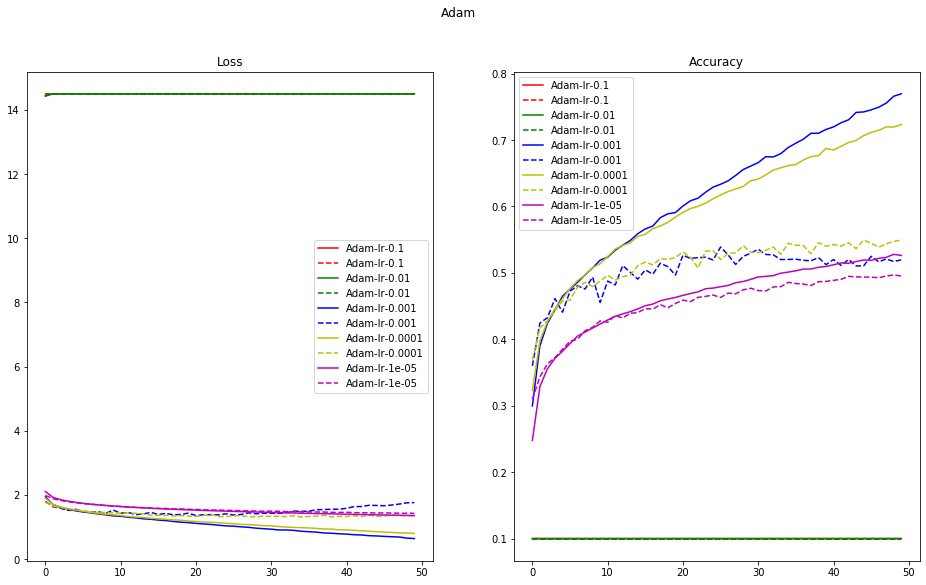

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m"]


for optimizers in optim:
    plt.figure(figsize=(16,9))
    plt.subplot(121).set_title('Loss')
    for i, cond in enumerate(results.keys()):
        if optimizers in cond:
            k = i % 5
            plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[k])
            plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[k])
    plt.legend(loc = 'best')
    
    plt.subplot(122).set_title('Accuracy')
    for i, cond in enumerate(results.keys()):
        if optimizers in cond:
            k = i % 5
            plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[k])
            plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[k])
    plt.legend(loc = 'best')
    plt.suptitle(optimizers)
    plt.show()